In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_dropout_model(dropout_rate=0.2):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

dropout_model = create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dropout_history = dropout_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
loss, accuracy = dropout_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy with Dropout: {accuracy:.4f}")
print(f"Test Loss with Dropout: {loss:.4f}")






Test Accuracy with Dropout: 0.8500
Test Loss with Dropout: 0.4083


In [4]:
def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation ='relu'),
        Dense(32, activation ='relu'),
        Dense(1, activation ='sigmoid')
    ])
    optimizer=Adam(clipnorm=clip_norm)
    model.compile(optimizer=optimizer,loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
gradient_clip_model=create_gradient_clip_model(clip_norm=1.0)
gradient_clip_history=gradient_clip_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
25/25 [==============================] - 1s 6ms/step - loss: 0.5877 - accuracy: 0.7275 - val_loss: 0.5285 - val_accuracy: 0.7650
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8587 - val_loss: 0.4416 - val_accuracy: 0.8150
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8700 - val_loss: 0.3964 - val_accuracy: 0.8300
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8763 - val_loss: 0.3785 - val_accuracy: 0.8250
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8825 - val_loss: 0.3720 - val_accuracy: 0.8300
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.8938 - val_loss: 0.3674 - val_accuracy: 0.8300
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.8925 - val_loss: 0.3659 - val_accuracy: 0.8300
Epoch 8/50
25/25 [==

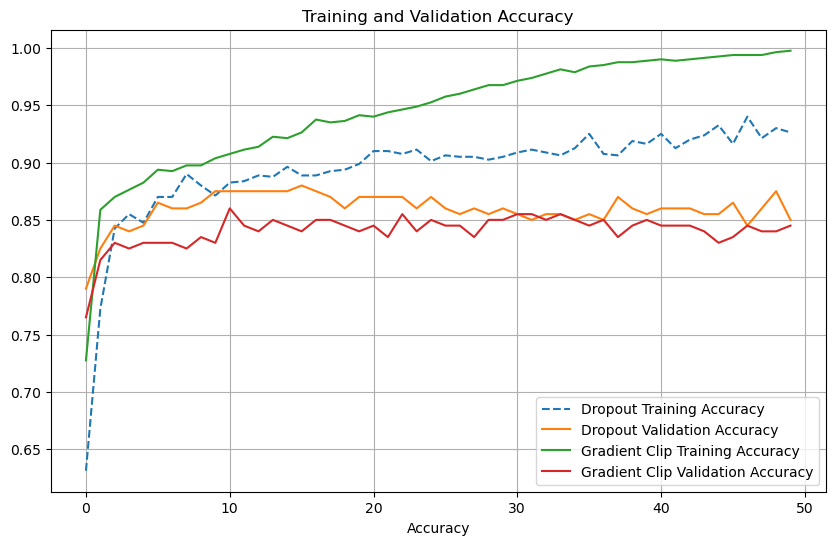

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(dropout_history.history['accuracy'],label='Dropout Training Accuracy', linestyle ='--')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout Validation Accuracy')
plt.plot(gradient_clip_history.history['accuracy'],label='Gradient Clip Training Accuracy')
plt.plot(gradient_clip_history.history['val_accuracy'],label='Gradient Clip Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
